Processing epoch1.txt
       Frame    Fwhm    Error Date
0  20apr0002  4.0350  0.08070  002
1  20apr0003  4.2465  0.08493  003
2  20apr0004  3.9030  0.07806  004
3  20apr0005  3.1790  0.06358  005
4  20apr0006  3.3140  0.06628  006
5  20apr0007  3.4525  0.06905  007
6  20apr0008  4.0670  0.08134  008
7  20apr0009  3.2960  0.06592  009
Processing epoch2.txt
       Frame    Fwhm    Error Date
0  24may0001  4.4105  0.08821  001
1  24may0002  3.6630  0.07326  002
2  24may0003  3.9900  0.07980  003
3  24may0005  3.9430  0.07886  005
4  24may0006  3.5350  0.07070  006
5  24may0007  3.8340  0.07668  007
6  24may0008  3.5435  0.07087  008
7  24may0009  3.3160  0.06632  009
Processing epoch3.txt
           Frame    Fwhm    Error Date
0  psf_12apr0211  5.2820  0.10564  211
1  psf_12apr0212  6.0155  0.12031  212
2  psf_12apr0213  5.3915  0.10783  213
3  psf_12apr0214  7.5465  0.15093  214
4  psf_12apr0215  6.2080  0.12416  215
5  psf_12apr0216  5.8525  0.11705  216
6  psf_12apr0217  5.6975  0.113

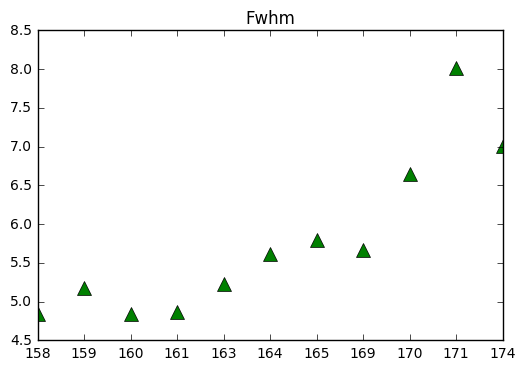

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

#font = {'family' : 'arial',
        #'weight' : 'normal',
        #'size'   : 15  }

#-plt.rc('font', **font)

folder_path = os.getcwd()

for file in os.listdir(folder_path):
    if glob.fnmatch.fnmatch(file,"epoch?.txt"):
        print ('Processing ' + file)
        name= os.path.splitext(file)[0]
        id=name[5:6]
       
        df = pd.read_csv(file, sep=" ", header=None)
        df.columns = ['Frame', 'Fwhm', 'Error']
        df['Date'] = df['Frame'].str.replace(r'([^-]*)[a-zA-Z]0','').str.strip()
       
        print (df)
    
        get_ipython().magic('matplotlib inline')
        
        xlab = df.Date.values
        ylab = df.Fwhm.values
     
        indx=[i for i in range(len(xlab))]
        x=range(len(xlab))
        plt.plot(indx, ylab,'g^', markersize=10)
        plt.xticks(x, xlab)
        plt.title('Fwhm')
        plt.savefig('Fwhm_'+id+'.png',dpi=100)
